# traffic_sign_detection using Yolo v7

In [1]:
# Cloning and downloading the YOLOv7 from github repository
!git clone https://github.com/WongKinYiu/yolov7

Cloning into 'yolov7'...


In [1]:
import os

In [2]:
cd yolov7/

D:\Arul-Projects\63056\yolov7


In [3]:
#Install the required packages and libraries
!pip install -r requirements.txt

Preparing image path in txt files

In [4]:
#Here we create the text file for model training
train_img_path = r"D:\Arul-Projects\63056\ITSDB\images\train"
val_img_path = r"D:\Arul-Projects\63056\ITSDB\images\val"

In [5]:
cd ..

D:\Arul-Projects\63056


In [6]:
cd ITSDB/

D:\Arul-Projects\63056\ITSDB


In [7]:
#Training images
with open('train.txt', "a+") as f:
  img_list = os.listdir(train_img_path)
  for img in img_list:
    f.write(os.path.join(train_img_path,img+'\n'))
  print("Done")

Done


In [8]:
# Validation Image
with open('val.txt', "a+") as f:
  img_list = os.listdir(val_img_path)
  for img in img_list:
    f.write(os.path.join(val_img_path,img+'\n'))
  print("Done")

Done


Creating Configuration file for training

In [11]:
#Here we copy and paste the coco.yaml with different name
import yaml
# open both files
with open(r'D:\Ragesh\63056\yolov7\data\coco.yaml','r') as firstfile, open(r'D:\Ragesh\63056\yolov7\data\custom.yaml','a') as secondfile:
      
    # read content from first file
    for line in firstfile:
               
             # append content to second file
            secondfile.write(line)

In [9]:
cd ..

D:\Arul-Projects\63056


In [10]:
cd yolov7/

D:\Arul-Projects\63056\yolov7


# Training Custom pretrained YOLOv7 model

In [11]:
#Here we train the model with image size=200, batch size=1 and 100 epochs. Here we give the data from custom.yaml using GPU for better improvement and speed
!python train.py --img 224 --batch 1 --cfg cfg/training/custom_yolov7.yaml --epochs 100 --data data/custom.yaml --weights yolov7.pt --device 0 --nosave --cache

^C


# Evaluation & Inference

In [17]:
# Here we detect the object by using pretrained weights and with 0.4 IoU threshold and confidence score for the detection of object.
!python detect.py --weights runs/train/exp/weights/last.pt  --img 224 --conf 0.5 --source test2/

Namespace(weights=['runs/train/exp/weights/last.pt'], source='test2/', img_size=224, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

4 Traffic Signs, Done. (19.9ms) Inference, (6.0ms) NMS
 The image with the result is saved in: runs\detect\exp\1.jpg
1 Traffic Sign, Done. (19.9ms) Inference, (1.0ms) NMS
 The image with the result is saved in: runs\detect\exp\1171.jpg
1 Traffic Sign, Done. (18.0ms) Inference, (2.0ms) NMS
 The image with the result is saved in: runs\detect\exp\1173.jpg
1 Traffic Sign, Done. (17.9ms) Inference, (1.0ms) NMS
 The image with the result is saved in: runs\detect\exp\1174.jpg
1 Traffic S

YOLOR  v0.1-122-g3b41c2c torch 2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4095.75MB)

D:\content\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS


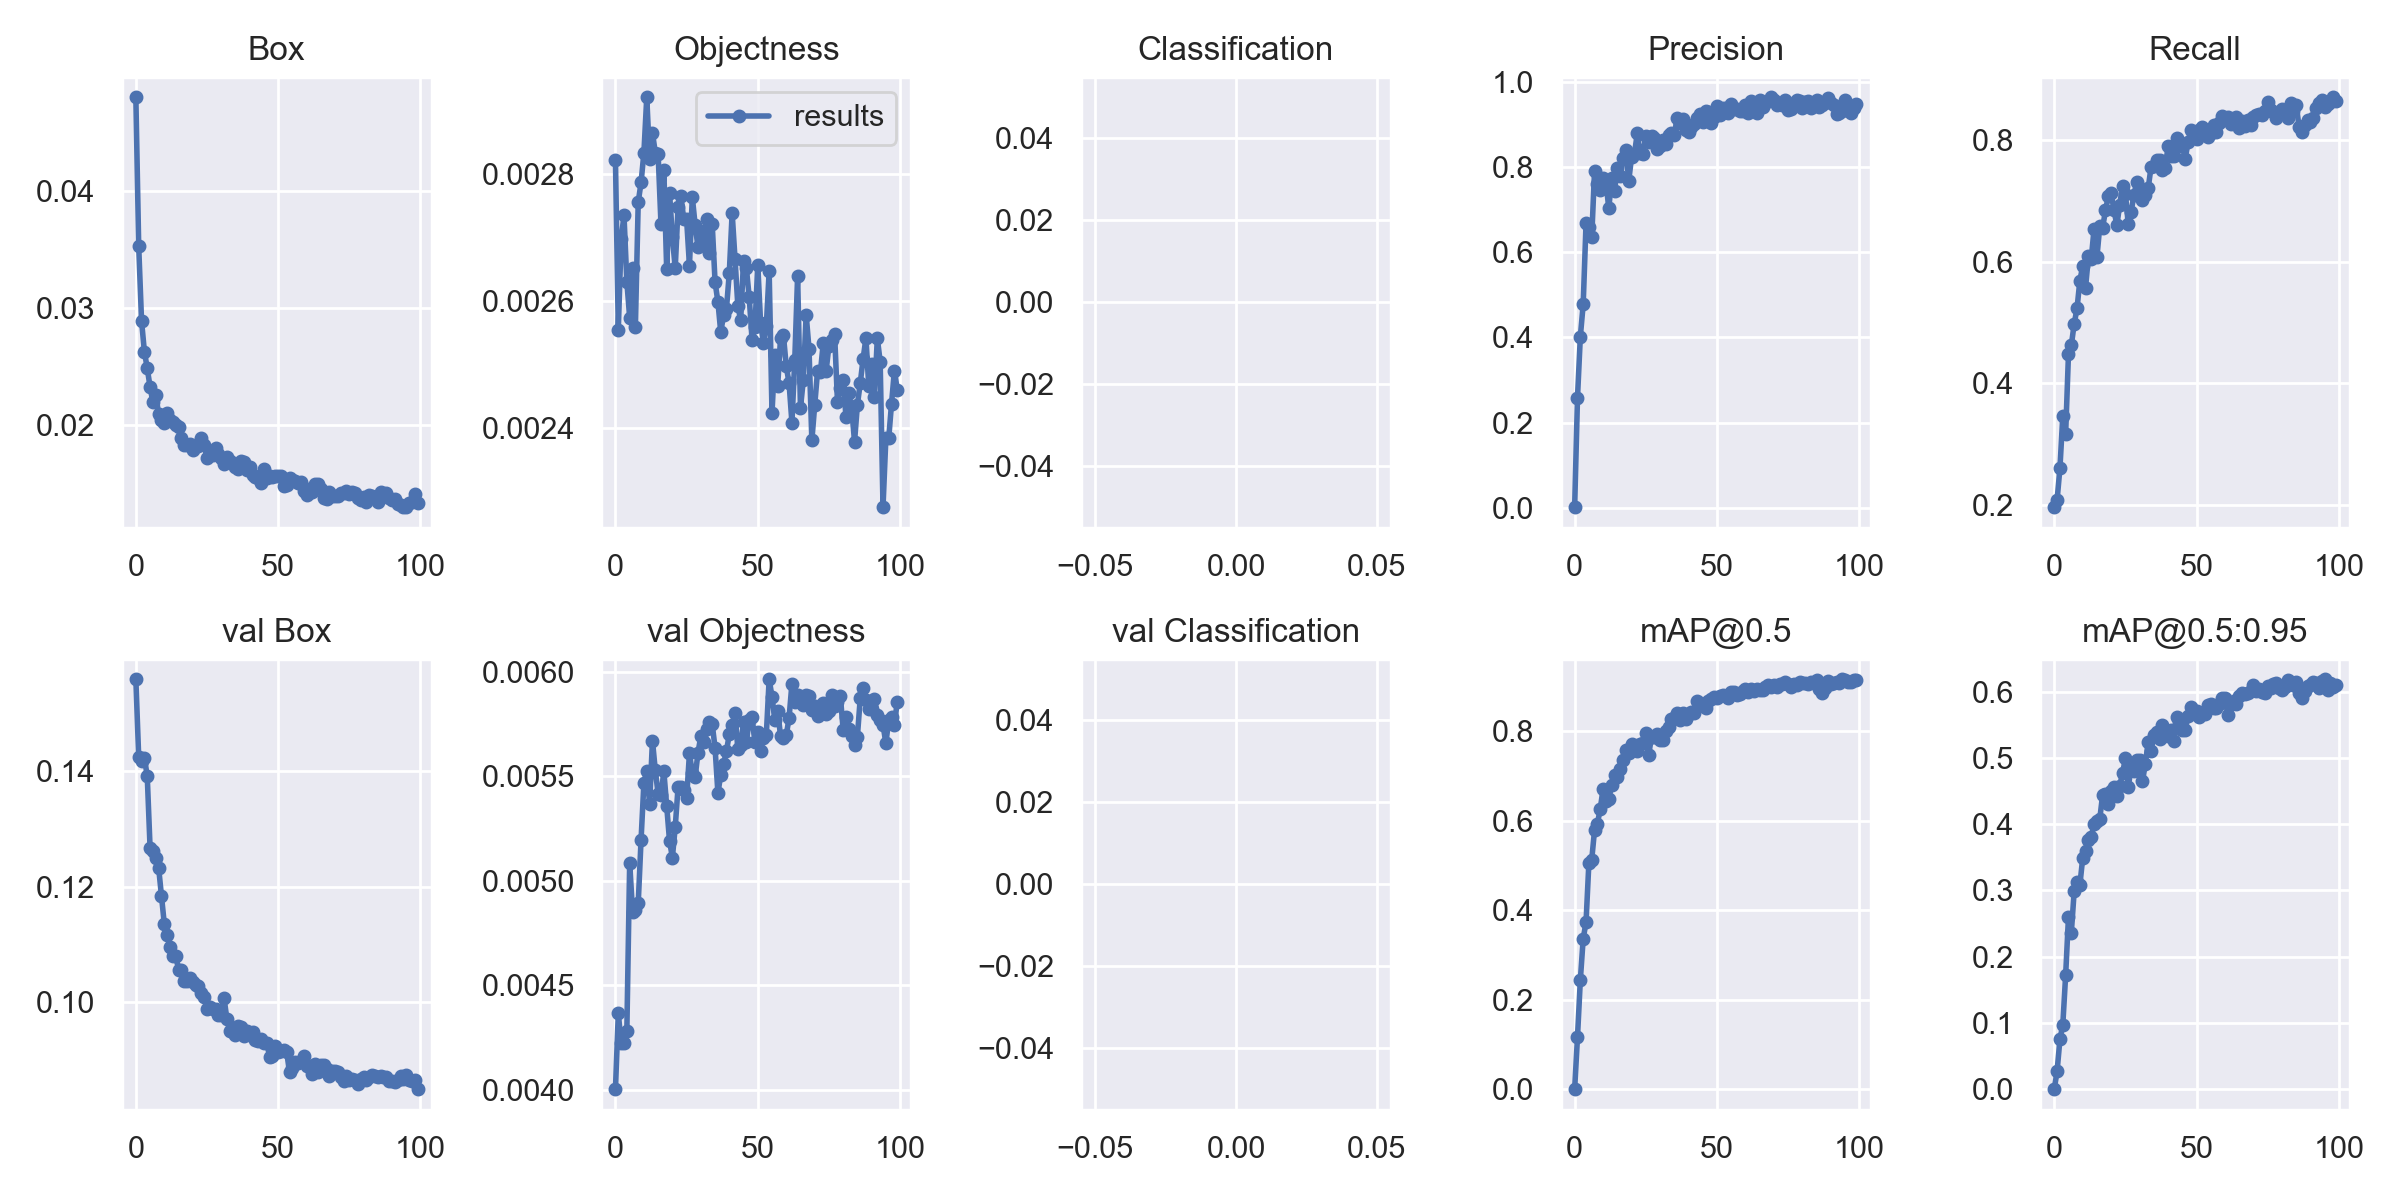

In [18]:
#Plot the performance metrics from directory
from IPython.display import display, Image
Image(filename='runs/train/exp/results.png', width=1000)

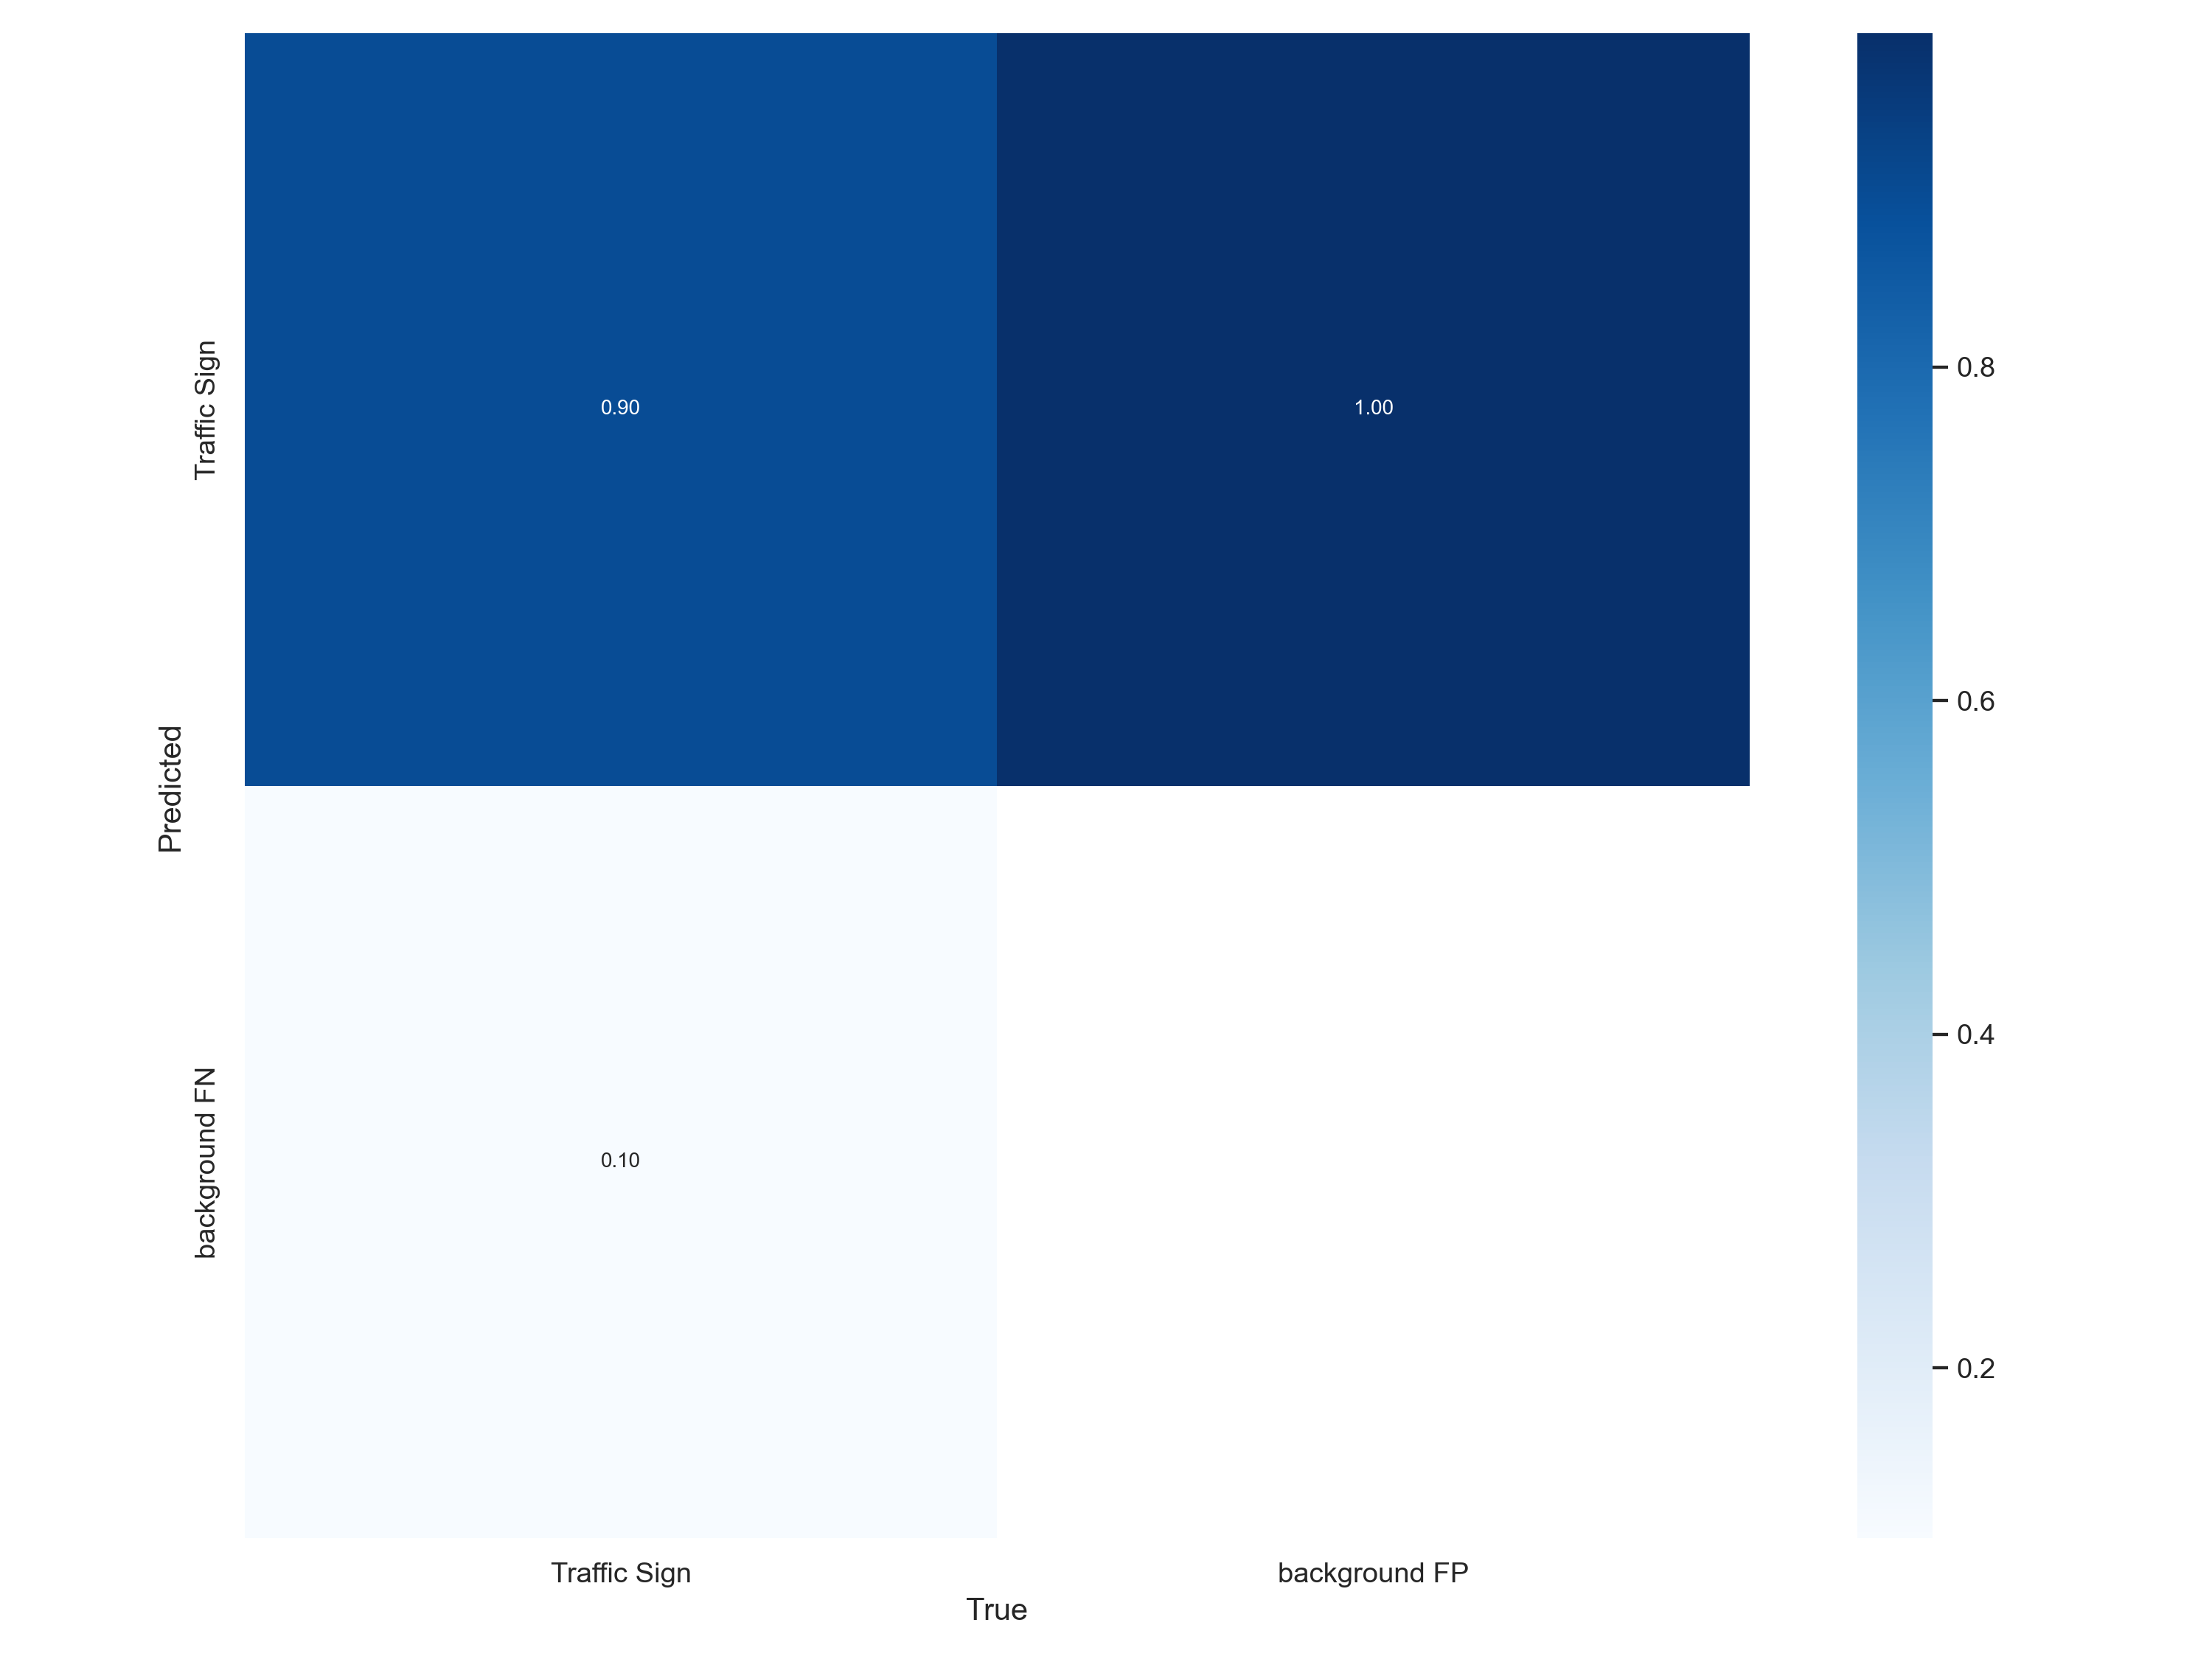

In [19]:
#Plot the performance metrics from directory
from IPython.display import display, Image
Image(filename='runs/train/exp/confusion_matrix.png', width=800)

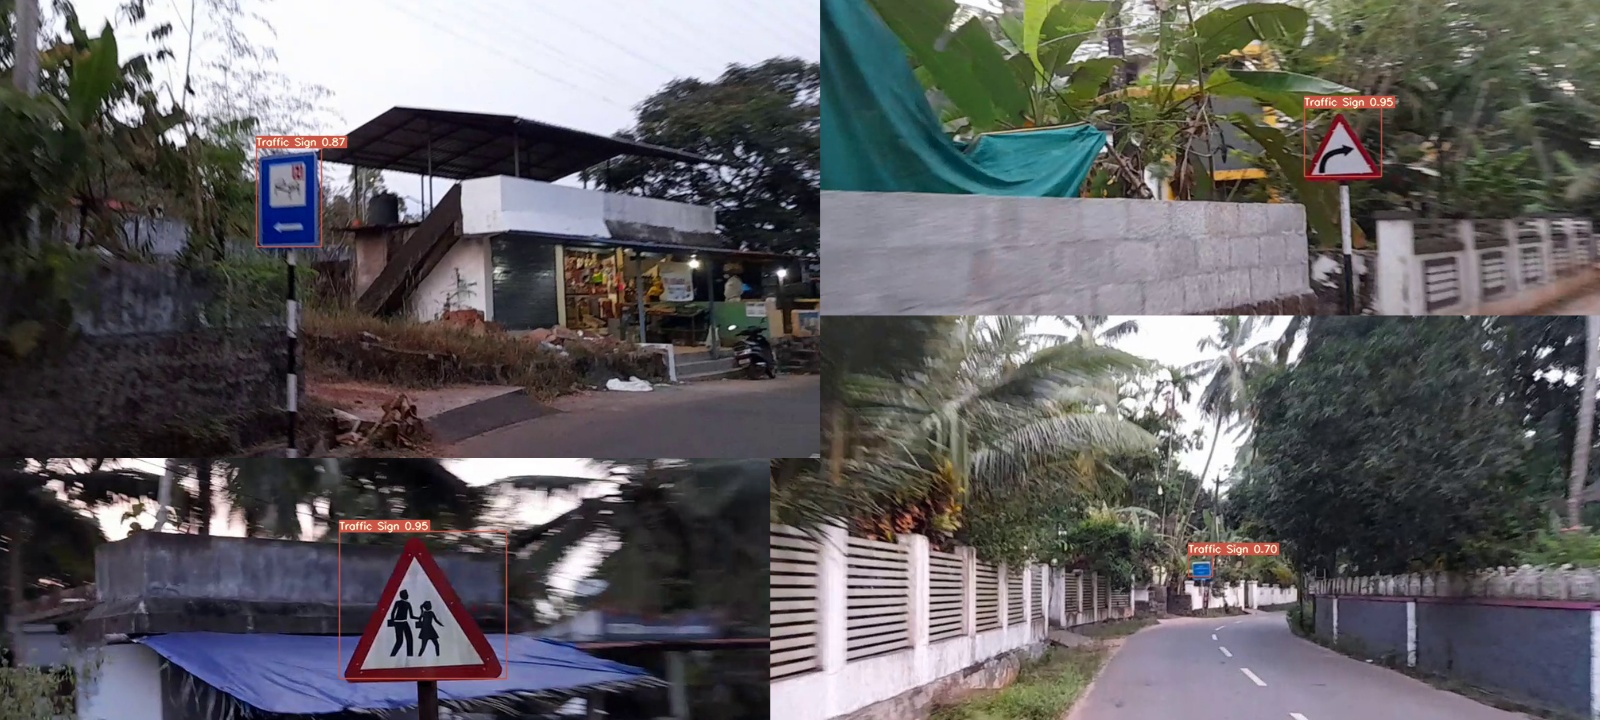

In [30]:
#Show the sample outputs from directory
from IPython.display import display, Image
Image(filename='runs/detect/exp/1.jpg', width=800)

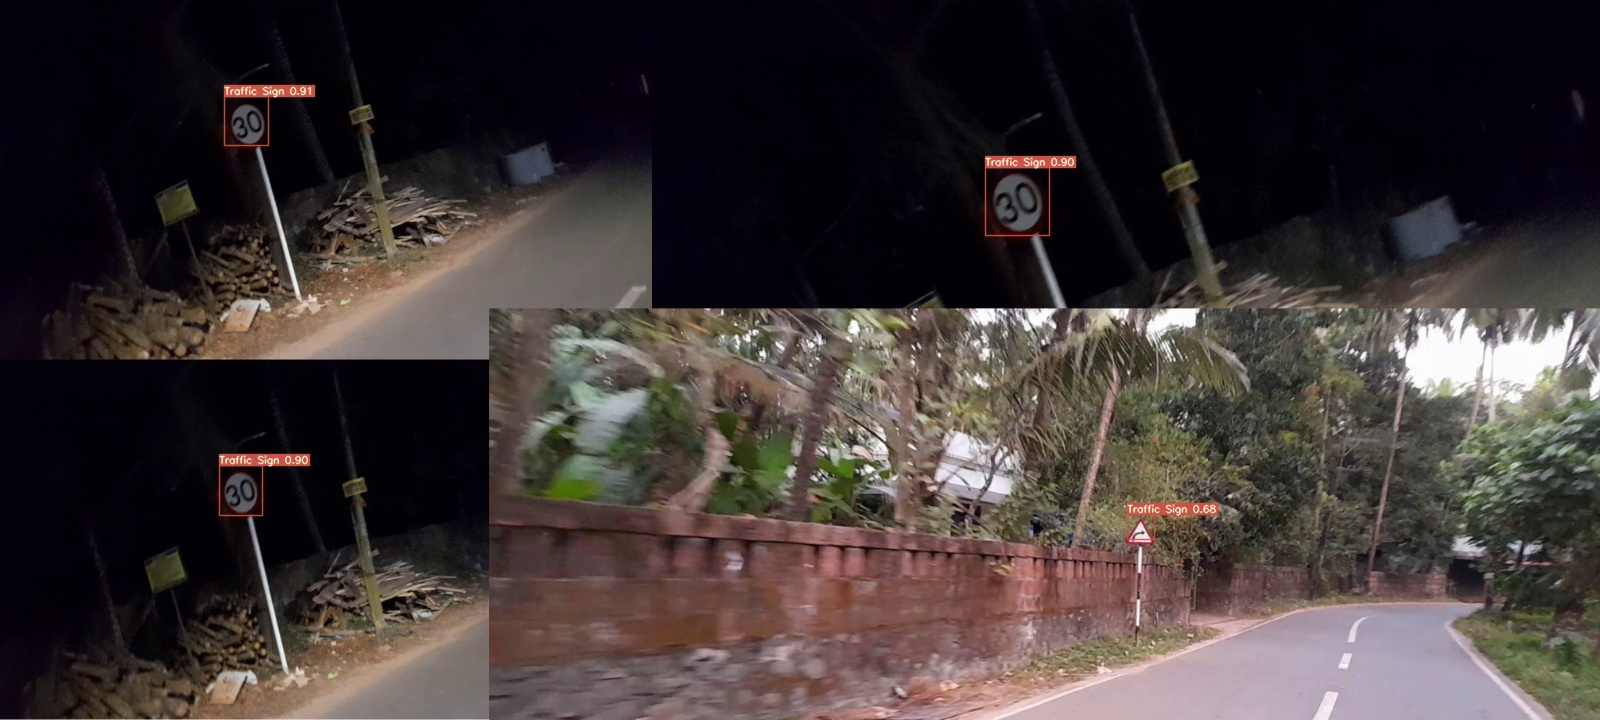

In [37]:
#Show the sample outputs from directory
from IPython.display import display, Image
Image(filename='runs/detect/exp/9.jpg', width=800)

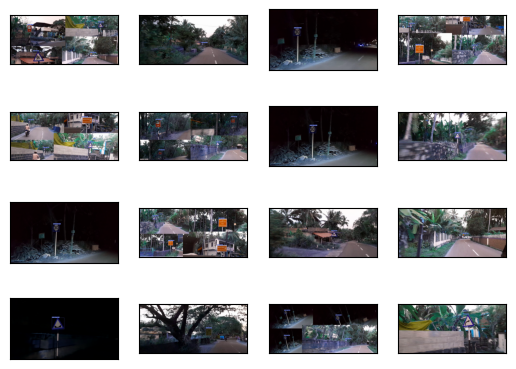

In [36]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
k = 0
for img in glob.glob("runs/detect/exp/*.jpg"):
    k += 1
    img = cv2.imread(img)
    plt.subplot(4, 4, k)                            # Address proper subplot in 2x2 array
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])
plt.show()